### 1.  Data loading
This section initiates the setup, loading the necessary datasets and libraries.

In [5]:
# Import necessary libraries for data manipulation and visualization
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the preprocessed graph details dataset
graph_details = pd.read_csv(r'data/cleaned_books_graph_facts.csv')

### 2. Interactive Visualizations with Plotly
Here, we utilize Plotly for generating interactive charts, which enhance data exploration.

In [3]:
# Import necessary libraries for data manipulation and visualization
import plotly.express as px

# Assuming you have relation_counts already calculated
relation_counts = graph_details['relation'].value_counts()

# Create an interactive bar chart
fig = px.bar(x=relation_counts.index, y=relation_counts.values, 
             title='Relation Frequency Distribution', 
             labels={'x':'Relations', 'y':'Frequency'})

# Show the interactive plot
fig.show()

 ### 3. Random Sampling

 To sample 100 unique entities (from the head column), filters the data to include only these entities, creates a relation matrix, and visualizes it as a heatmap. This visualization helps quickly identify patterns or clusters within the relationship

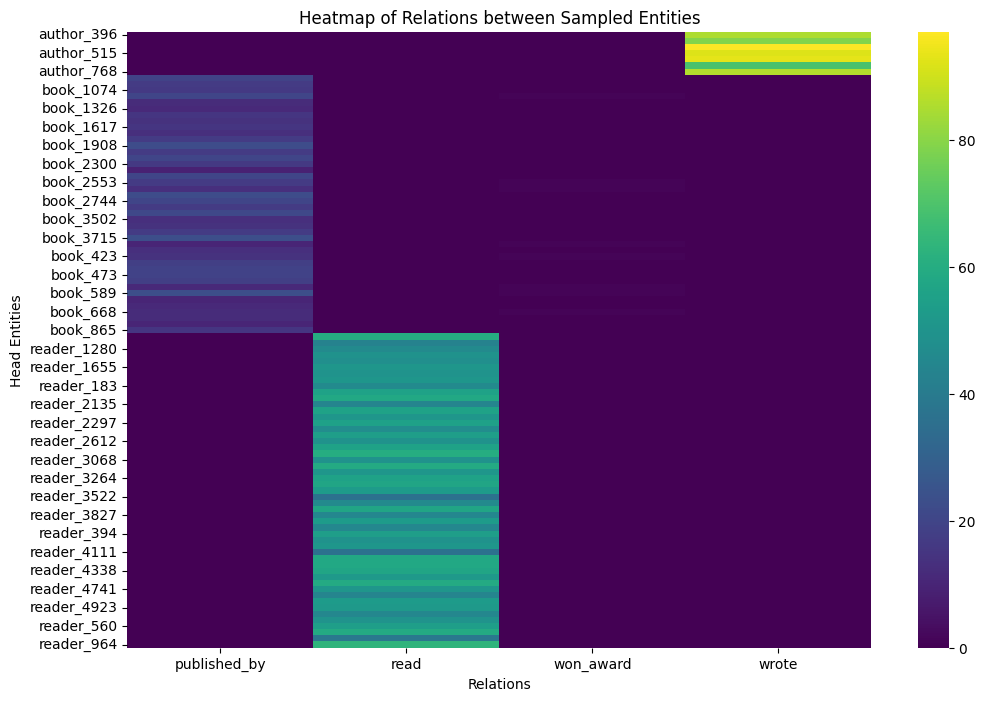

In [6]:
# Sample a subset of head entities for the heatmap (e.g., 100 head entities)
sampled_heads = graph_details['head'].drop_duplicates().sample(100)

# Filter the DataFrame based on the sampled head entities
sampled_df = graph_details[graph_details['head'].isin(sampled_heads)]

# Create the relation matrix for the sampled data
relation_matrix_sampled = sampled_df.groupby(['head', 'relation']).size().unstack(fill_value=0)

# Plot the heatmap
plt.figure(figsize=(12,8))
sns.heatmap(relation_matrix_sampled, cmap='viridis')
plt.title('Heatmap of Relations between Sampled Entities')
plt.xlabel('Relations')
plt.ylabel('Head Entities')
plt.show()

This heatmap shows the relationship distribution among a randomly sampled set of entities across four key relations. The sparse areas indicate that certain relations are not applicable to some entities, while concentrated areas (like in the read and wrote relations) suggest stronger activity for those entities in those relationships

### 4. Frequency-based Filtering
 Identify the 100 most common (frequent) head entities within the graph_details dataset.
 Selects the top 100 most frequent entities in the head column, filters the data to include only those entities, constructs a relation matrix, and visualizes it as a heatmap

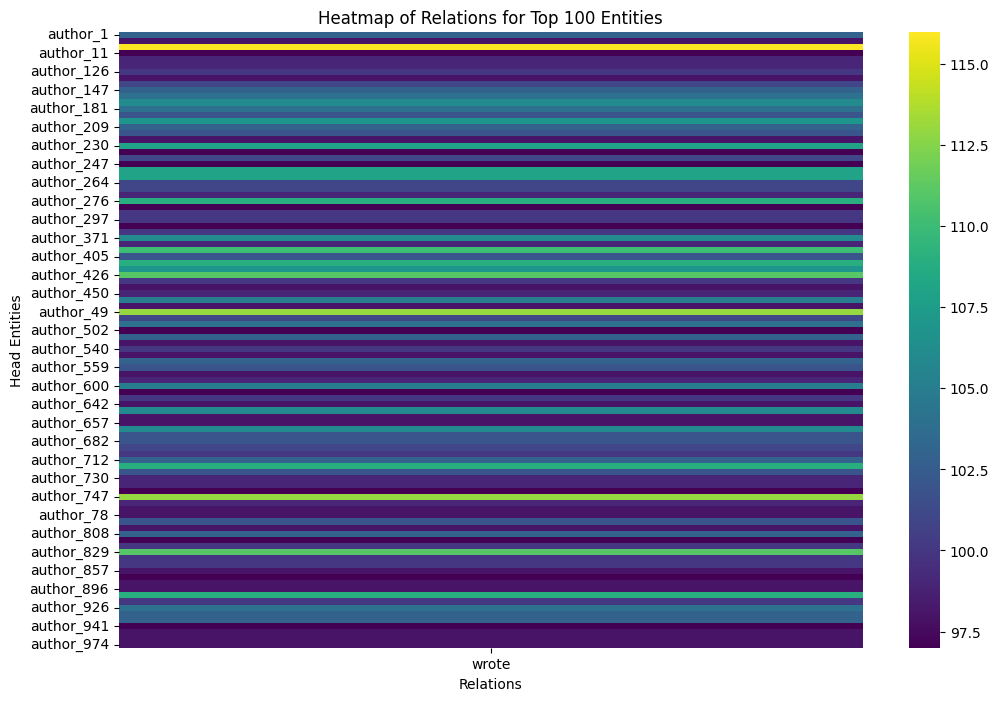

In [7]:
# Select the top 100 most frequent head entities
top_heads = graph_details['head'].value_counts().nlargest(100).index

# Filter the DataFrame based on the top head entities
filtered_df = graph_details[graph_details['head'].isin(top_heads)]

# Create the relation matrix for the filtered data
relation_matrix_filtered = filtered_df.groupby(['head', 'relation']).size().unstack(fill_value=0)

# Plot the heatmap
plt.figure(figsize=(12,8))
sns.heatmap(relation_matrix_filtered, cmap='viridis')
plt.title('Heatmap of Relations for Top 100 Entities')
plt.xlabel('Relations')
plt.ylabel('Head Entities')
plt.show()

Most of the top 100 authors have contributed similarly when it comes to the wrote relation, with only slight variations in frequency. The continuous and consistent coloring suggests that there are no extreme outliers in terms of relation frequency among these top entities